In [71]:
%matplotlib inline

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, fbeta_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

In [73]:
df = pd.read_csv("./datasets/SBI.csv")
df

,Unnamed: 0,id,fever_hours,age,sex,wcc,prevAB,sbi,pct,crp
0,1,57906,24.0,0.79,M,3.8,No,UTI,0.090000,17.700000
1,2,58031,48.0,1.91,F,25.3,Yes,UTI,4.400000,150.400000
2,3,58148,24.0,0.07,F,20.0,No,UTI,0.548136,47.359279
3,4,58169,72.0,0.95,M,6.0,No,UTI,0.310000,4.900000
4,5,58517,1.0,0.11,F,15.6,No,UTI,0.936872,31.394860
...,...,...,...,...,...,...,...,...,...,...
2343,2344,229318,48.0,1.06,M,14.1,No,NotApplicable,0.160000,16.700000
2344,2345,229506,24.0,3.05,M,14.6,No,NotApplicable,1.080000,77.500000
2345,2346,229794,48.0,1.81,M,6.0,No,NotApplicable,0.480000,75.300000
2346,2347,229962,24.0,1.24,M,16.3,Yes,NotApplicable,20.280000,17.300000


In [74]:
selected_features = ['wcc', 'age', 'prevAB', 'pct', 'crp']
selected_features

['wcc', 'age', 'prevAB', 'pct', 'crp']

In [75]:
le = LabelEncoder()

In [76]:
df['prevAB'] = le.fit_transform(df['prevAB'])

In [77]:
X = np.asarray(df[selected_features])
y = np.asarray(df['sbi'])
y

array(['UTI', 'UTI', 'UTI', ..., 'NotApplicable', 'NotApplicable',
       'NotApplicable'], dtype=object)

In [78]:
y_count = Counter(y)
for i in y_count.keys():
  print(i, ":", y_count[i])

UTI : 311
Pneu : 251
Bact : 34
NotApplicable : 1752


In [79]:
X

array([[3.80000000e+00, 7.90000021e-01, 0.00000000e+00, 9.00000000e-02,
        1.77000000e+01],
       [2.53000000e+01, 1.90999997e+00, 1.00000000e+00, 4.40000000e+00,
        1.50400000e+02],
       [2.00000000e+01, 7.00000000e-02, 0.00000000e+00, 5.48135972e-01,
        4.73592787e+01],
       ...,
       [6.00000000e+00, 1.80999994e+00, 0.00000000e+00, 4.80000000e-01,
        7.53000000e+01],
       [1.63000000e+01, 1.24000001e+00, 1.00000000e+00, 2.02800000e+01,
        1.73000000e+01],
       [1.30000000e+01, 3.55999994e+00, 0.00000000e+00, 6.06292932e-01,
        1.81811341e+01]])

In [80]:
le = LabelEncoder()
y = le.fit_transform(y)

In [81]:
print(y)

[3 3 3 ... 1 1 1]


In [82]:
y_count_new = Counter(y)
for i in y_count_new.keys():
  print(i, ":", y_count_new[i])

3 : 311
2 : 251
0 : 34
1 : 1752


In [83]:
corrMatrix = df[selected_features].corr()
print(corrMatrix)

             wcc       age    prevAB       pct       crp
wcc     1.000000 -0.041746 -0.033232  0.115960  0.342304
age    -0.041746  1.000000  0.133857  0.002325  0.060748
prevAB -0.033232  0.133857  1.000000  0.045014  0.064978
pct     0.115960  0.002325  0.045014  1.000000  0.266078
crp     0.342304  0.060748  0.064978  0.266078  1.000000


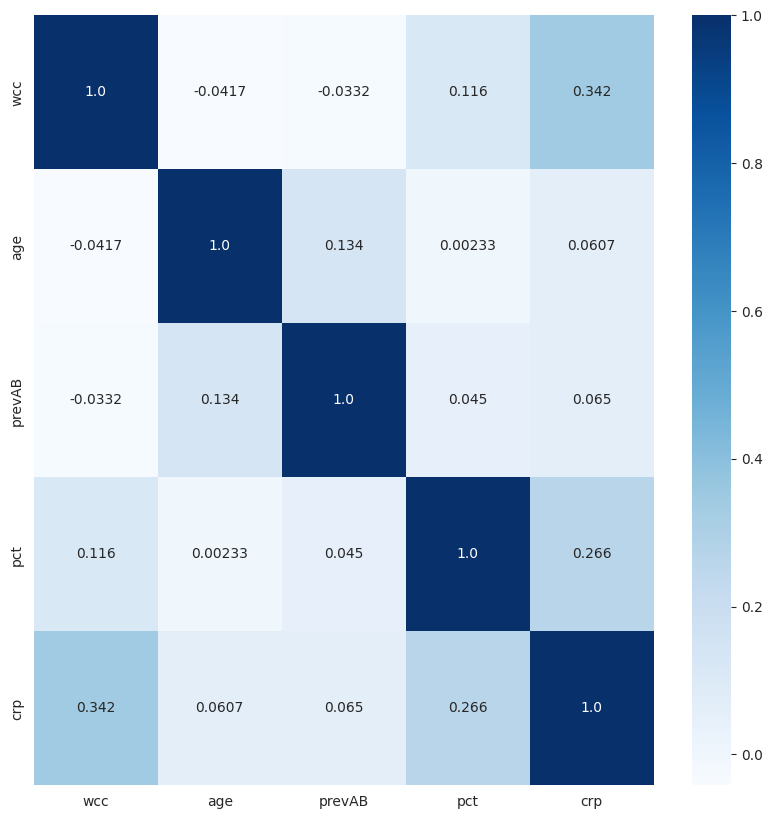

In [84]:
fig = plt.figure(figsize=(10,10))
heatmap = sns.heatmap(corrMatrix, annot=True, fmt='.3', cmap='Blues')

In [85]:
sc = StandardScaler()
X_data = sc.fit_transform(X)
X_data

array([[-1.37744753, -0.78838875, -0.84490746, -0.48084528, -0.58373446],
       [ 1.97150108,  0.05600131,  1.18356157,  0.08639689,  1.93827151],
       [ 1.14594631, -1.33121098, -0.84490746, -0.42054968, -0.02005037],
       ...,
       [-1.03476442, -0.01939068, -0.84490746, -0.42951711,  0.51097197],
       [ 0.56961562, -0.44912488,  1.18356157,  2.17637503, -0.59133659],
       [ 0.05559095,  1.29996886, -0.84490746, -0.4128956 , -0.57459035]])

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=1234)

In [189]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

random_forest = RandomForestClassifier(max_features='log2')
random_forest.fit(X_train, y_train)
print(random_forest)

RandomForestClassifier(max_features='log2')


In [190]:
decision_tree.score(X_test, y_test)

0.5872340425531914

In [191]:
random_forest.score(X_test, y_test)

0.7212765957446808

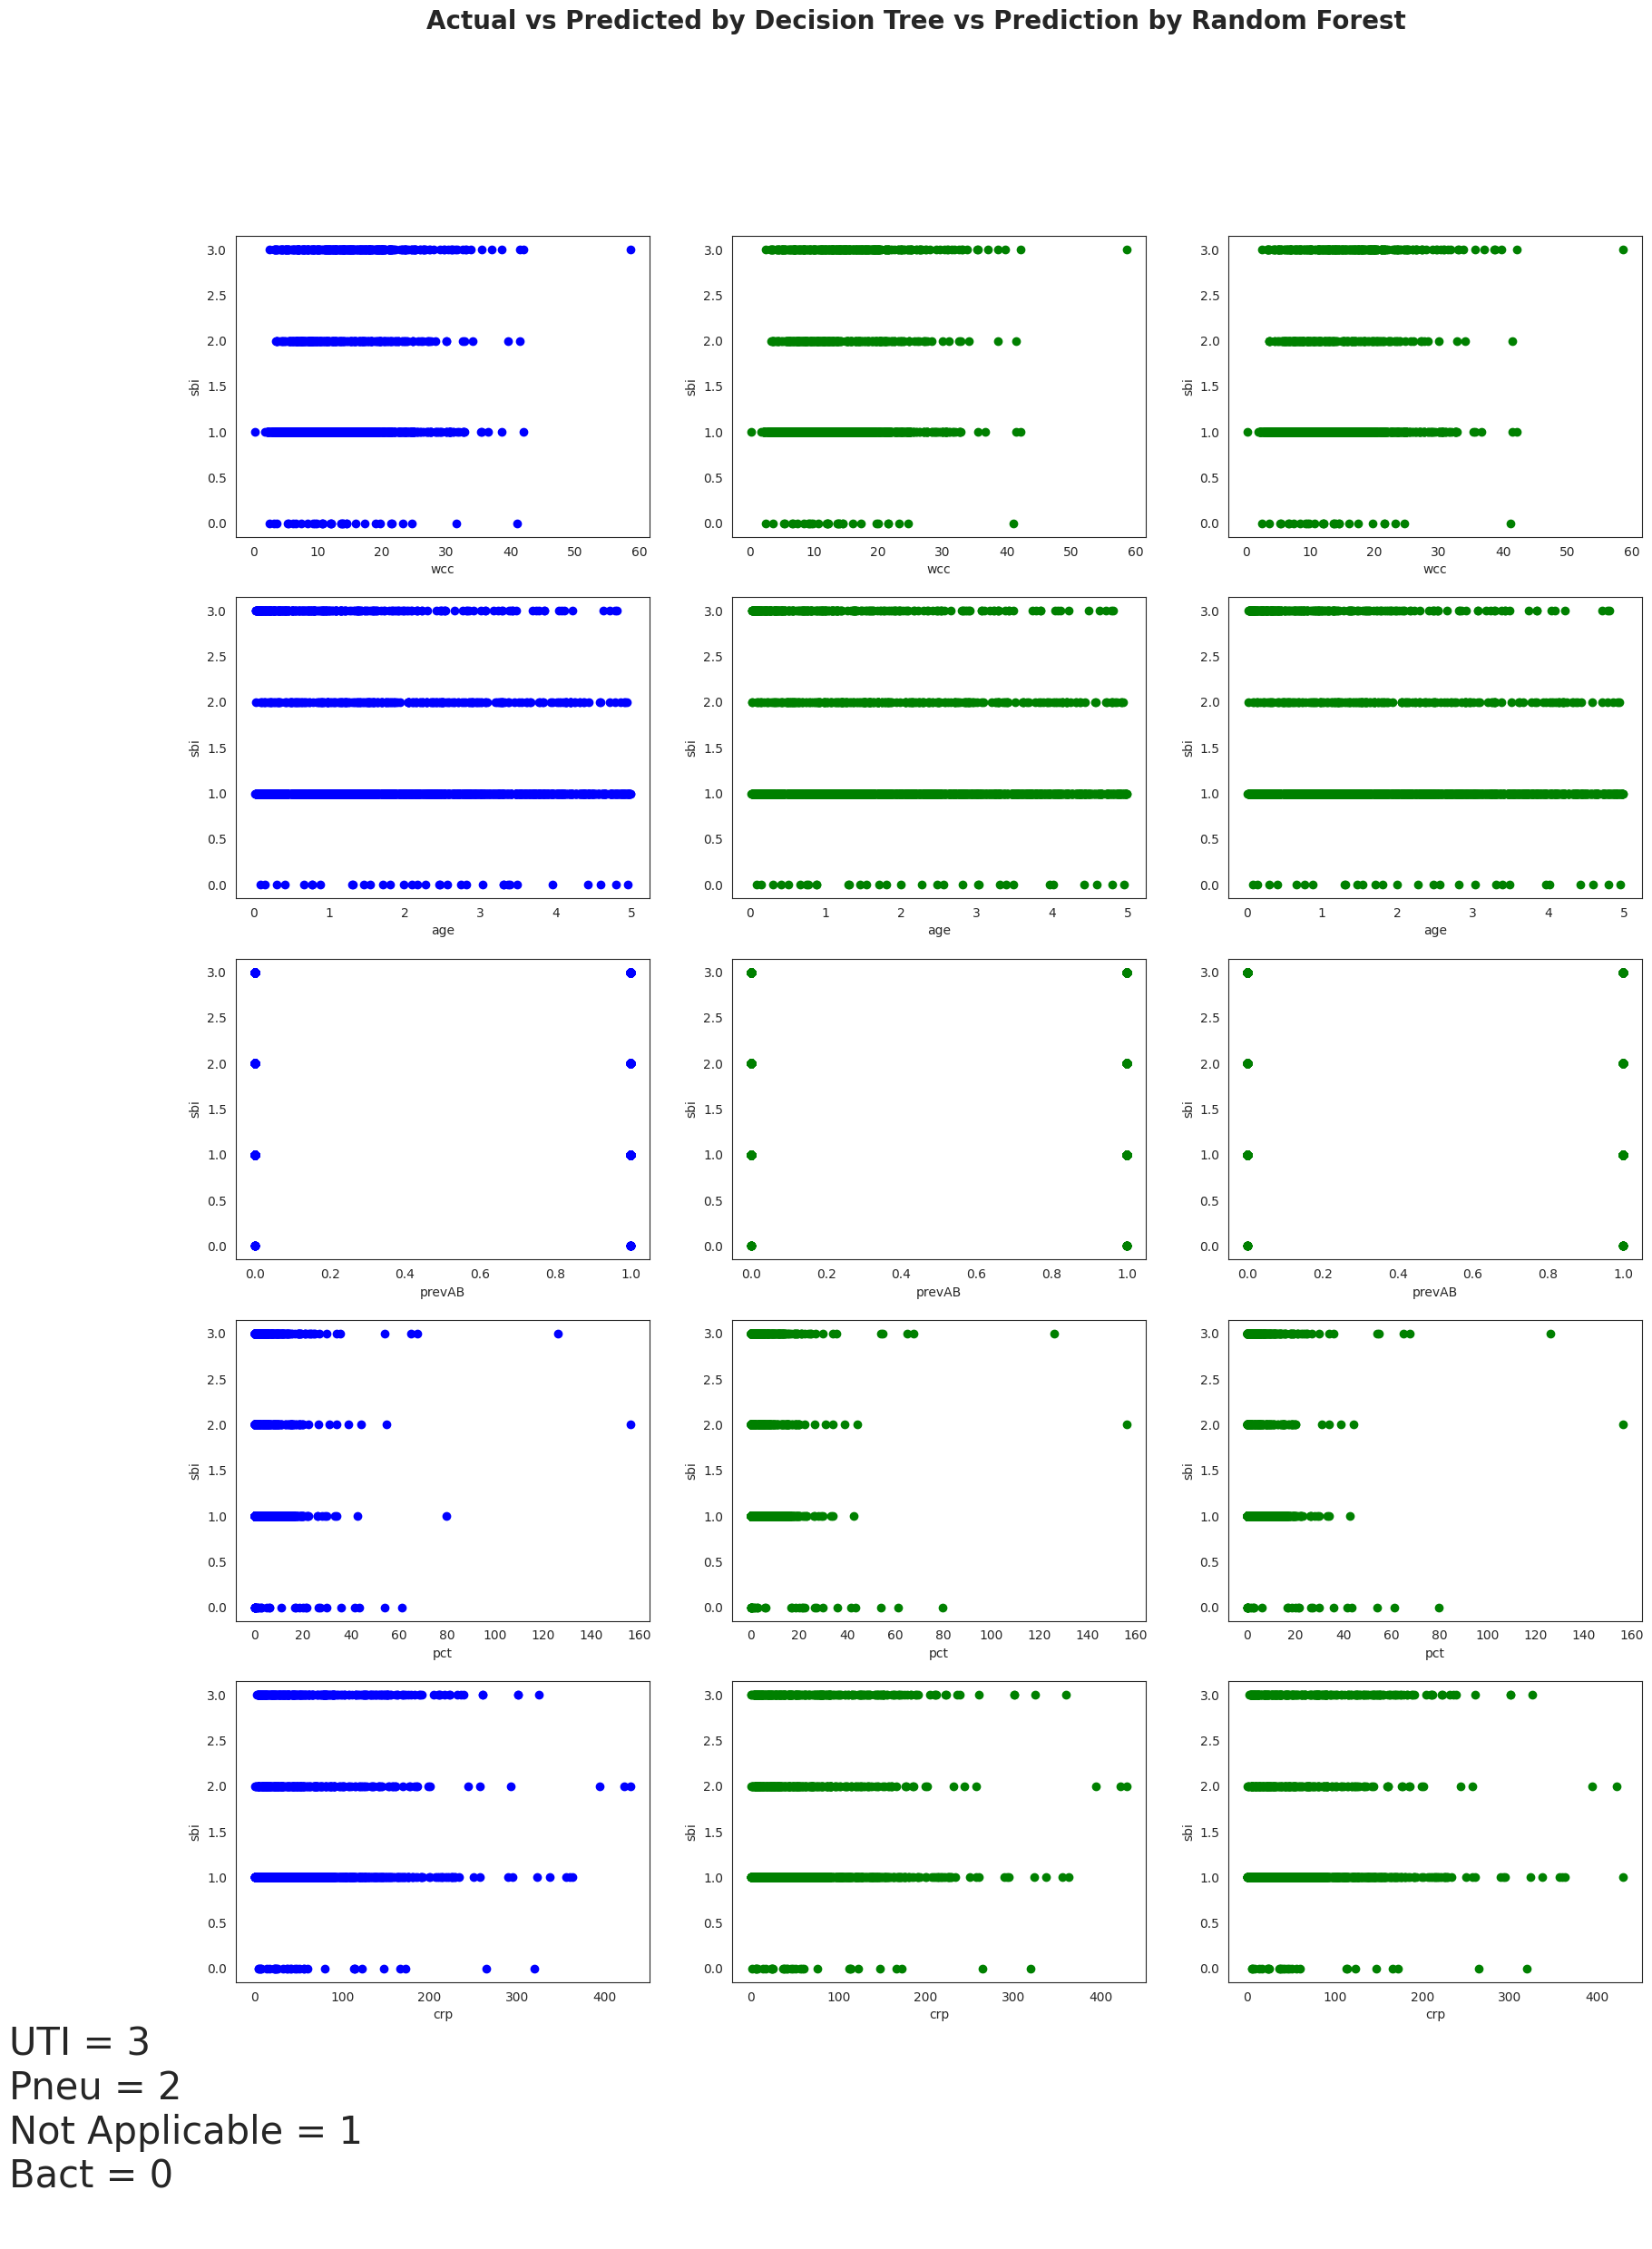

In [197]:
fig, ax = plt.subplots(5, 3)
fig.set_facecolor('white')
fig.set_figheight(25)
fig.set_figwidth(20)
fig.suptitle('Actual vs Predicted by Decision Tree vs Prediction by Random Forest', fontsize=20, fontweight=600)
fig.text(0, 0, '''UTI = 3
Pneu = 2
Not Applicable = 1
Bact = 0
''', fontdict={ 'fontsize': 30 })

j = 0
for i in selected_features:
  ax[j,0].scatter(y=y, x=df[i], color='blue')
  ax[j,0].set(xlabel=i, ylabel='sbi')

  ax[j,1].scatter(y=decision_tree.predict(X_data), x=df[i], color='green')
  ax[j,1].set(xlabel=i, ylabel='sbi')

  ax[j,2].scatter(y=random_forest.predict(X_data), x=df[i], color='green')
  ax[j,2].set(xlabel=i, ylabel='sbi')

  j += 1
plt.show()

In [198]:
cf_matrix1 = confusion_matrix(y_test, decision_tree.predict(X_test))
cf_matrix1

array([[  0,   5,   2,   0],
       [  3, 250,  47,  34],
       [  1,  45,   8,   6],
       [  1,  35,  15,  18]])

In [199]:
cf_matrix2 = confusion_matrix(y_test, random_forest.predict(X_test))
cf_matrix2

array([[  0,   7,   0,   0],
       [  1, 322,   0,  11],
       [  0,  57,   0,   3],
       [  0,  52,   0,  17]])

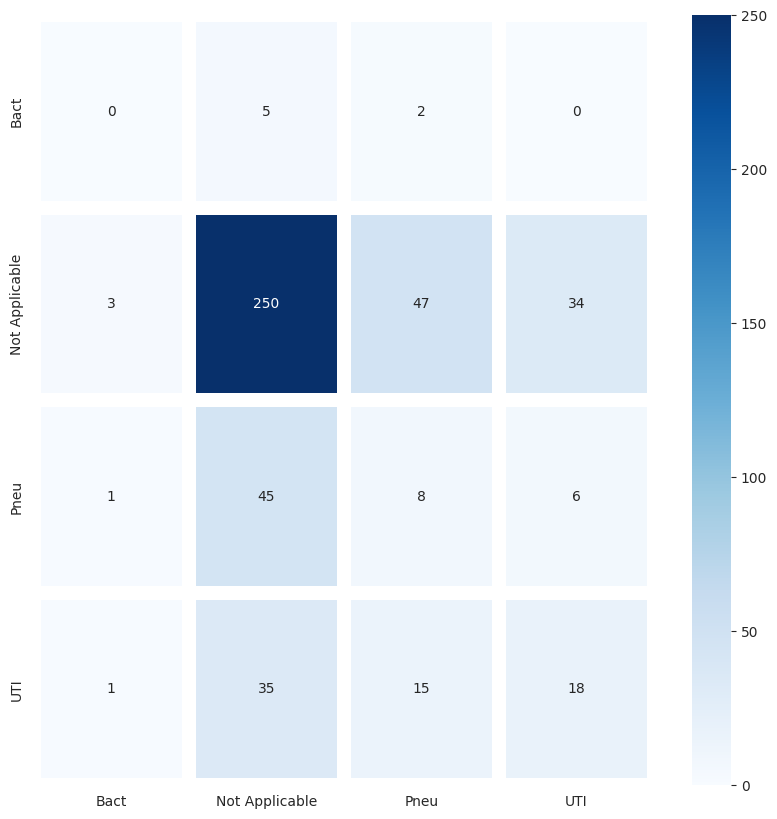

In [200]:
sns.set_style("white")
fig = plt.figure(figsize=(10,10))
heatmap = sns.heatmap(cf_matrix1, cmap="Blues", annot=True, fmt="", linewidths=10)
heatmap.xaxis.set_ticklabels(['Bact', 'Not Applicable', 'Pneu', 'UTI'])
heatmap.yaxis.set_ticklabels(['Bact', 'Not Applicable', 'Pneu', 'UTI'])
plt.show()

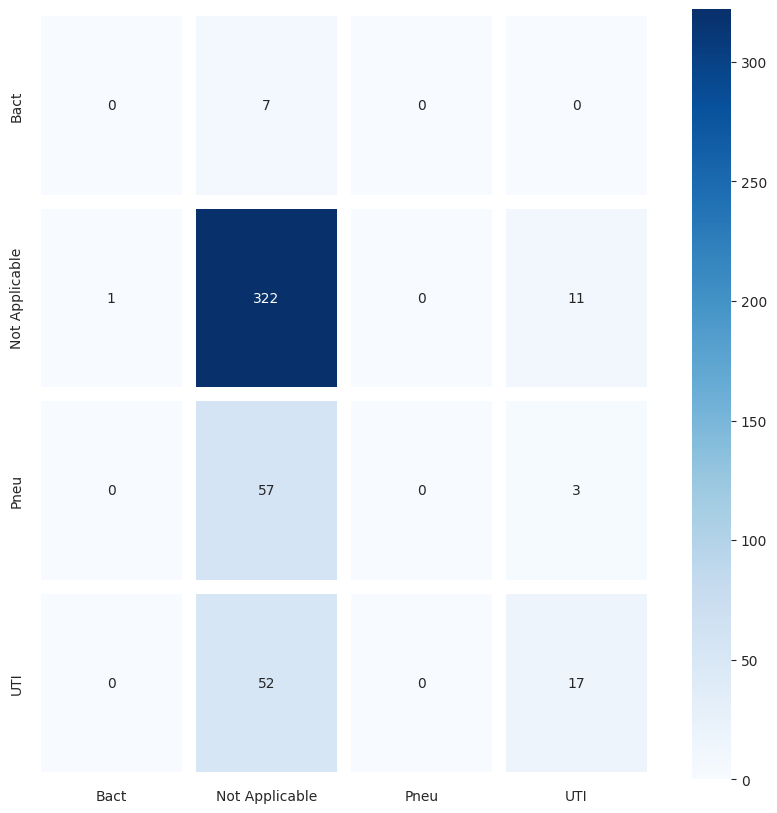

In [201]:
sns.set_style("white")
fig = plt.figure(figsize=(10,10))
heatmap = sns.heatmap(cf_matrix2, cmap="Blues", annot=True, fmt="", linewidths=10)
heatmap.xaxis.set_ticklabels(['Bact', 'Not Applicable', 'Pneu', 'UTI'])
heatmap.yaxis.set_ticklabels(['Bact', 'Not Applicable', 'Pneu', 'UTI'])
plt.show()

In [202]:
print(decision_tree.predict([[29,1,0,5,200]]))
print(random_forest.predict([[29,1,0,5,200]]))

[2]
[2]


In [203]:
precision_score(y, decision_tree.predict(X_data), average='macro')

0.8546455883251382

In [204]:
precision_score(y, random_forest.predict(X_data), average='macro')

0.9626259157509158

In [205]:
recall_score(y, decision_tree.predict(X_data), average='macro')

0.8437534971436674

In [206]:
recall_score(y, random_forest.predict(X_data), average='macro')

0.8452554837354671

### Since FP is more important in this dataset than FN, therefore precision is given higher priority and thus fbeta is calculated with beta=0.5

In [207]:
f1by2_score1 = fbeta_score(y, decision_tree.predict(X_data), beta=0.5, average='macro')
f1by2_score1

0.8522333467737961

In [208]:
f1by2_score2 = fbeta_score(y, random_forest.predict(X_data), beta=0.5, average='macro')
f1by2_score2

0.9341729685408314